In [1]:
from keras.datasets import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [2]:
# Model configuration
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

In [3]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) =mnist.load_data()

# Shape of the input sets
input_train_shape = input_train.shape
input_test_shape = input_test.shape

# Keras layer input shape
input_shape = (input_train_shape[1], input_train_shape[2], 1)

# Reshape the training data to include channels
input_train = input_train.reshape(input_train_shape[0], input_train_shape[1], input_train_shape[2], 1)

input_test = input_test.reshape(input_test_shape[0], input_test_shape[1], input_test_shape[2], 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize input data
input_train = input_train / 255
input_test = input_test / 255

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metric  s
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/25
192/192 [==============================] - 3s 7ms/step - loss: 0.2963 - accuracy: 0.9170 - val_loss: 0.0822 - val_accuracy: 0.9760
Epoch 2/25
192/192 [==============================] - 1s 6ms/step - loss: 0.0716 - accuracy: 0.9781 - val_loss: 0.0578 - val_accuracy: 0.9833
Epoch 3/25
192/192 [==============================] - 1s 6ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0498 - val_accuracy: 0.9859
Epoch 4/25
192/192 [==============================] - 1s 6ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0445 - val_accuracy: 0.9863
Epoch 5/25
192/192 [==============================] - 1s 6ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0384 - val_accuracy: 0.9901
Epoch 6/25
192/192 [==============================] - 1s 6ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 7/25
192/192 [==============================] - 1s 6ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0431 - val_accuracy: 0.9879
Epoch 

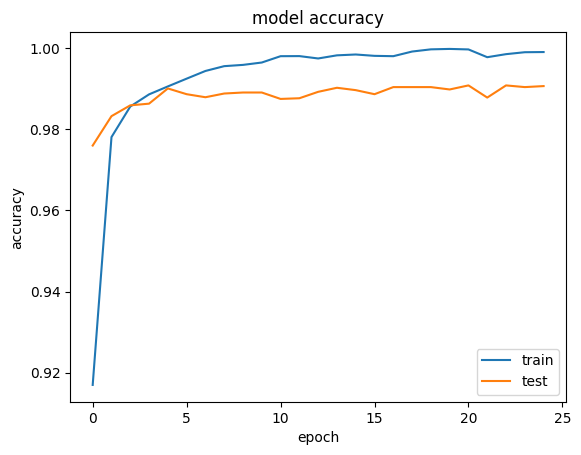

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(no_classes, activation='softmax'))


In [6]:
# Compile the model
model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metric  s
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/25
192/192 [==============================] - 5s 10ms/step - loss: 0.1144 - accuracy: 0.9647 - val_loss: 8.1108 - val_accuracy: 0.1060
Epoch 2/25
192/192 [==============================] - 2s 8ms/step - loss: 0.0288 - accuracy: 0.9917 - val_loss: 4.5714 - val_accuracy: 0.1904
Epoch 3/25
192/192 [==============================] - 1s 8ms/step - loss: 0.0139 - accuracy: 0.9963 - val_loss: 0.1883 - val_accuracy: 0.9398
Epoch 4/25
192/192 [==============================] - 1s 8ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0365 - val_accuracy: 0.9889
Epoch 5/25
192/192 [==============================] - 2s 10ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 6/25
192/192 [==============================] - 2s 9ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.0301 - val_accuracy: 0.9906
Epoch 7/25
192/192 [==============================] - 2s 8ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9908
Epoc

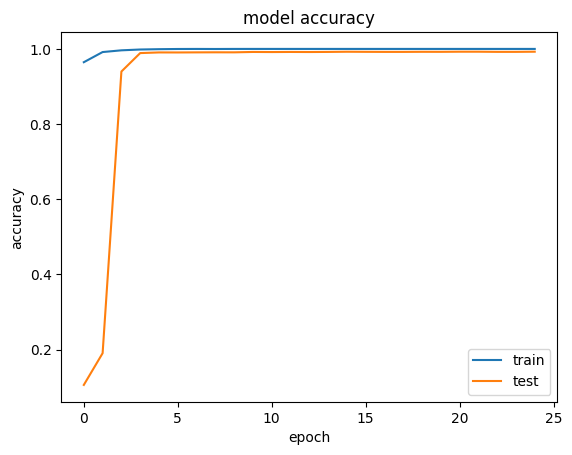

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()